# Electric Vehicles Market Size Analysis using Python

##### Objective: 
Market size analysis is essential for evaluating the potential sales volume and growth opportunities within a market. It helps businesses estimate demand, assess market penetration, and identify untapped segments. In this project, we will perform an Electric Vehicles (EV) market size analysis using Python to calculate key metrics like Total Addressable Market (TAM) and market penetration. The process includes collecting data, preprocessing it, estimating market size, and visualizing results using Python libraries. This approach provides actionable insights to support strategic decision-making in the EV industry.

# Importing Library
#### import pandas as pd
#### import numpy as np
#### import seaborn as sns
#### import matplotlib.pyplot as plt

<B>Data Reading</b>

In [4]:
import pandas as pd
ev_data = pd.read_csv(r"C:\Users\Satyam Gupta\Downloads\EV-data\Electric_Vehicle_Population_Data.csv")
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_data.shape

(177866, 17)

In [7]:
ev_data.isnull()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
ev_data.notnull()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
177862,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
177863,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
177864,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [9]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [10]:
ev_data.isnull().sum().sum()

423

#### DATA CLEANING

In [12]:
ev_data.dropna(inplace = True)

In [13]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [14]:
ev_data.isnull().sum().sum()

0

In [15]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [16]:
ev_data.shape

(177473, 17)

<H3>VISUALIZATION</H3>

In [18]:
#I HAV ECOUNT THE REGISTRATION BY MODEL YEAR
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

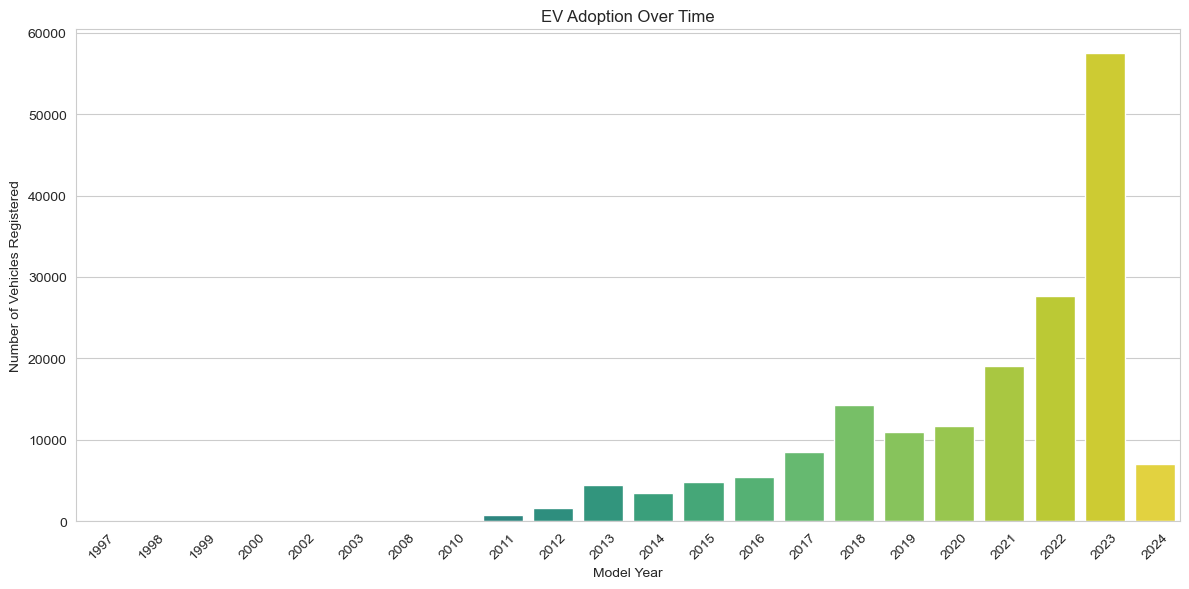

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")  # USED IN BAR AND LINE GRAPH

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, hue=ev_adoption_by_year.index,palette="viridis",legend=False)

plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

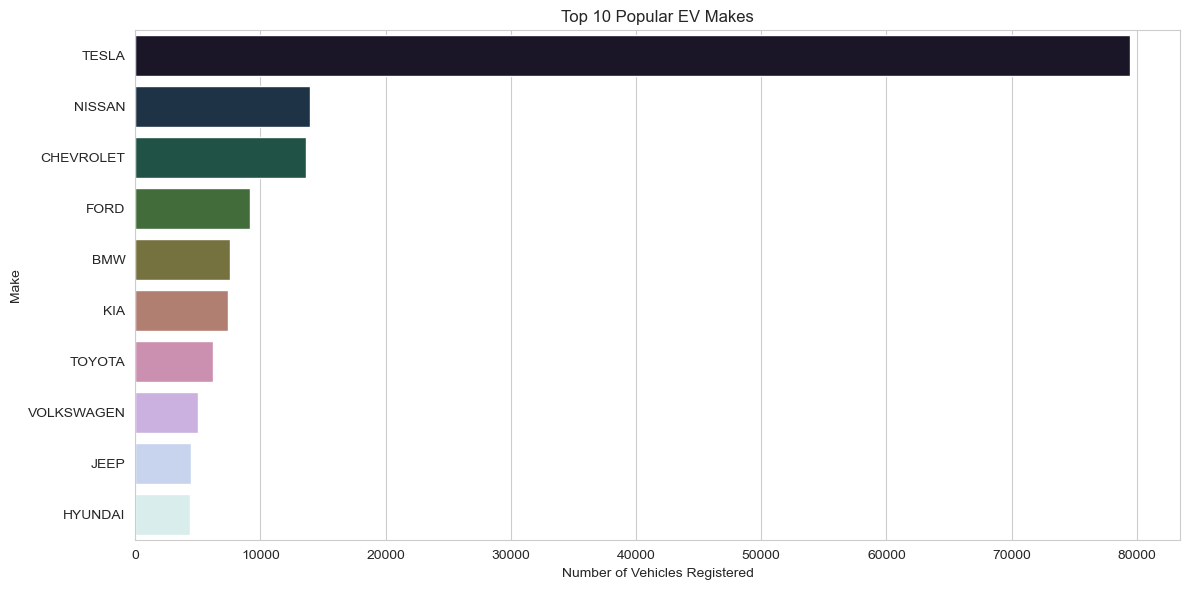

In [21]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index,hue=ev_make_distribution.index, palette="cubehelix",  legend = False)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [22]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

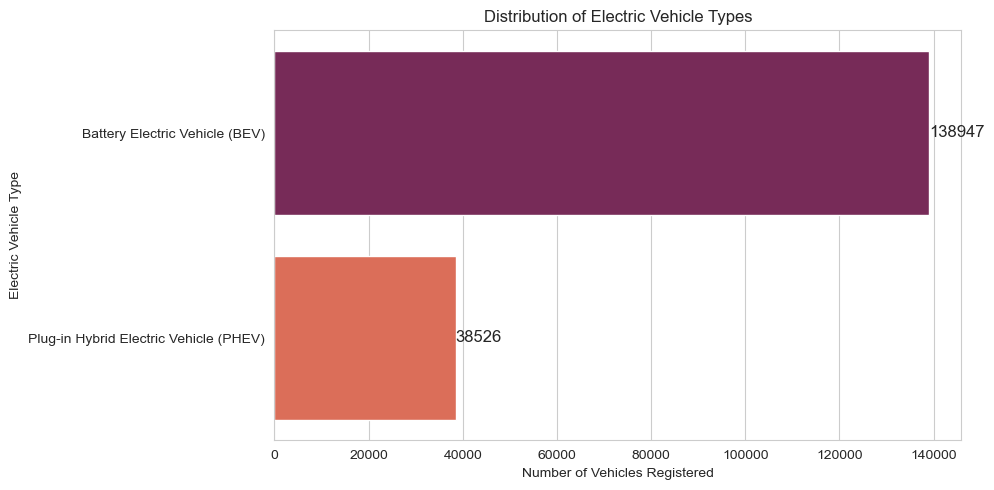

In [24]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 5))
sn = sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,hue=ev_type_distribution.index, palette="rocket", legend = False)
for i in sn.containers:
    sn.bar_label(i,fontsize=12)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')

plt.tight_layout()
plt.show()

In [26]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

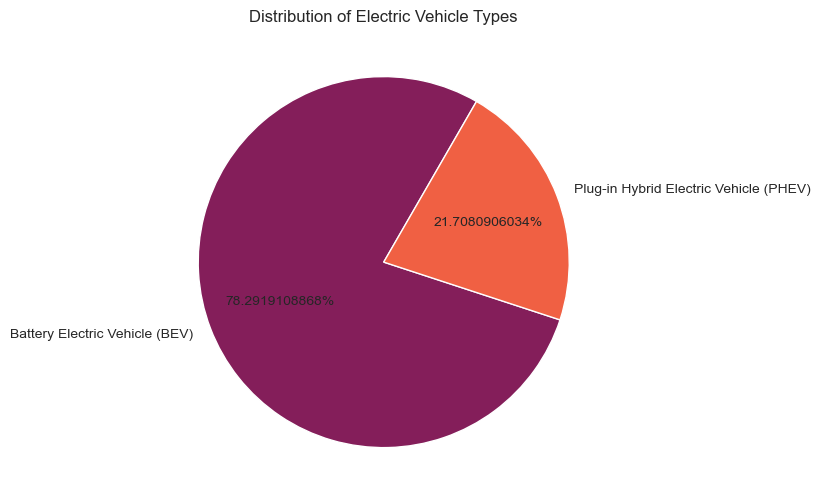

In [28]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ev_type_distribution.values, 
    labels=ev_type_distribution.index, 
    autopct='%1.10f%%',  # Display percentages
    startangle=60,     # Rotate the pie for better readability
    colors=sns.color_palette("rocket", len(ev_type_distribution))  # Use the "rocket" palette
)

plt.title('Distribution of Electric Vehicle Types')
plt.tight_layout()
plt.show()

In [ ]:
!pip install squarify


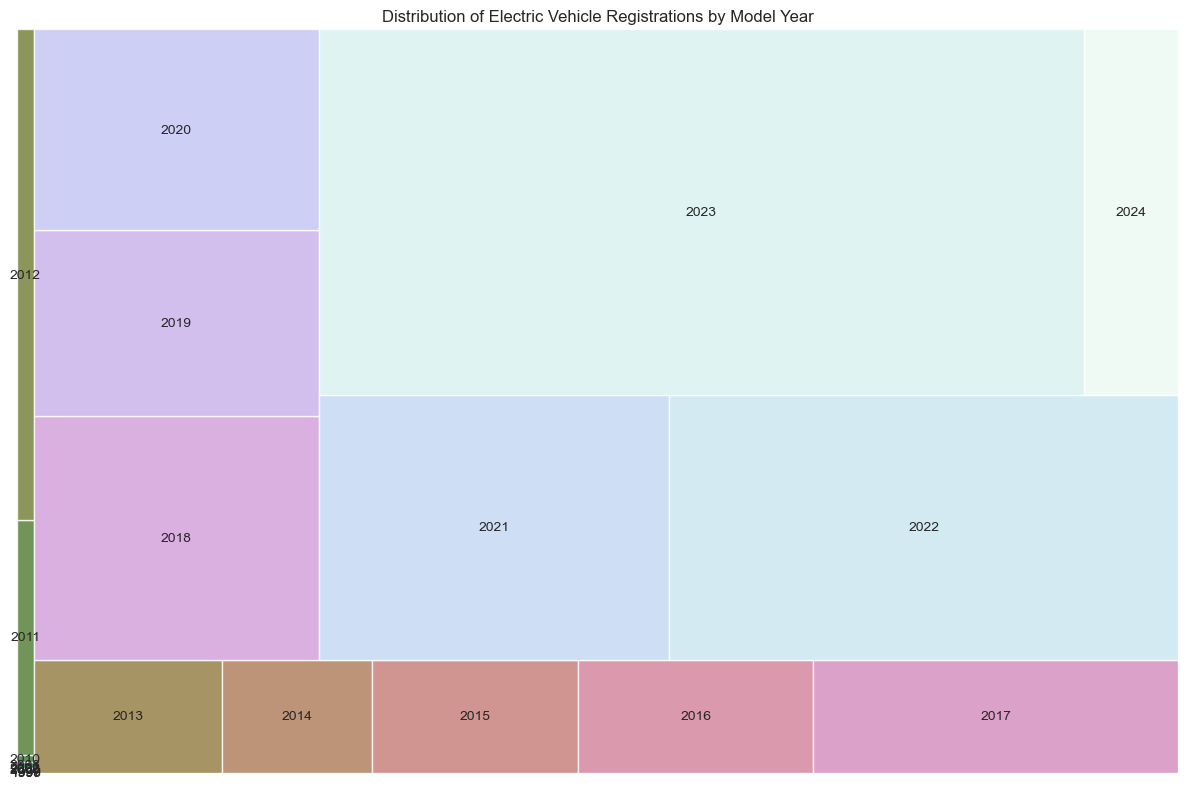

In [30]:
import squarify
# Treemap visualization
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=ev_registration_counts.values, 
    label=ev_registration_counts.index, 
    color=sns.color_palette("cubehelix", len(ev_registration_counts)), 
    alpha=0.8
)

plt.title('Distribution of Electric Vehicle Registrations by Model Year')
plt.axis('off') 
plt.tight_layout()
plt.show()

In [32]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
average_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


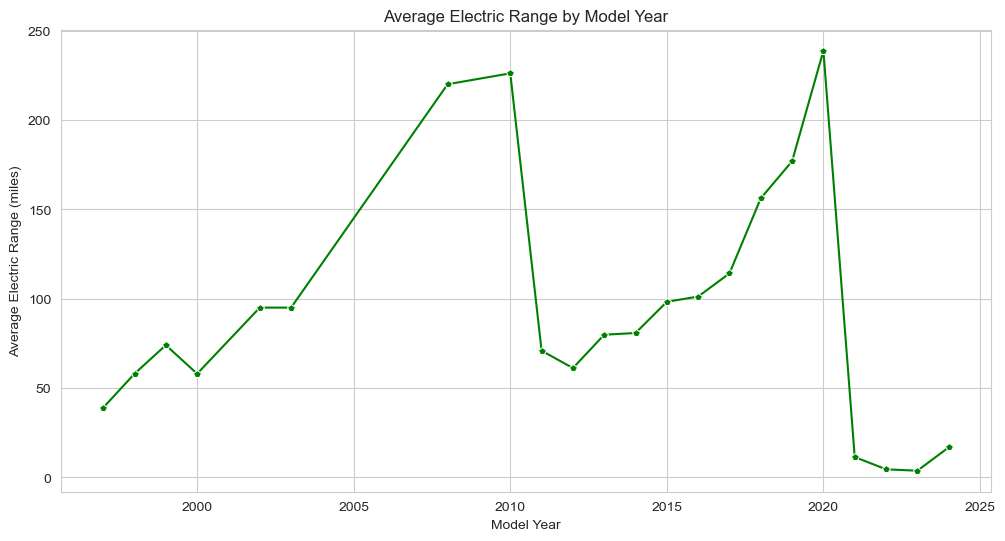

In [34]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year,marker= 'p', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

<B>CONCLUSION</B>